# Chapter 6 - Data Visualization

Time series lends itself naturally to visualization. Line plots of observations over time are popular, but there is a suite of other plots that you can use to learn more about your problem.

The more you learn about your data, the more likely you are to develop a better forecasting model.

After completing this tutorial, you will know:
- How to explore the temporal structure of time series with line plots, lag plots, and
autocorrelation plots.
- How to understand the distribution of observations using histograms and density plots.
- How to tease out the change in distribution over intervals using box and whisker plots
and heat map plots.

## 6.1 Time Series Visualization

We will take a look at 6 different types of visualizations that you can use on your own time series data. They are:
1. Line Plots.
2. Histograms and Density Plots.
3. Box and Whisker Plots.
4. Heat Maps.
5. Lag Plots or Scatter Plots.
6. Autocorrelation Plots.

## 6.2 Minimum Daily Temperatures Dataset

We will use the Minimum Daily Temperatures dataset as an example. This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

## 6.3 Line Plot

In this plot, time is shown on the x-axis with observation values along the y-axis.

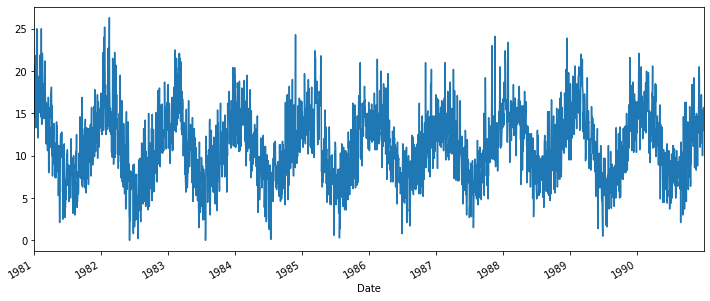

In [1]:
# create a line plot
from pandas import read_csv
from matplotlib import pyplot

%matplotlib inline

csvfile = '.\\code\chapter_06\daily-minimum-temperatures.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

series.plot(figsize=(12,5))
pyplot.show()

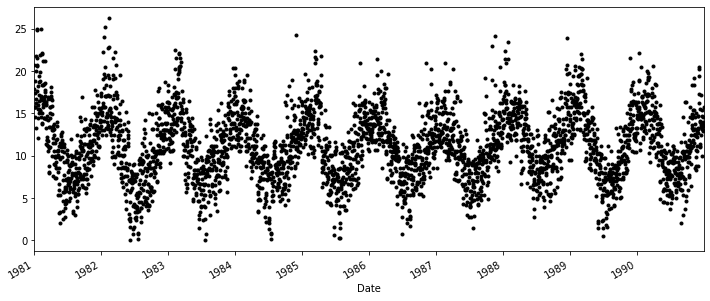

In [2]:
# create a line plot
from pandas import read_csv
from matplotlib import pyplot

%matplotlib inline

csvfile = '.\\code\chapter_06\daily-minimum-temperatures.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

series.plot(style='k.', figsize=(12,5)) # use a dashed line by setting style to be 'k--'.
pyplot.show()

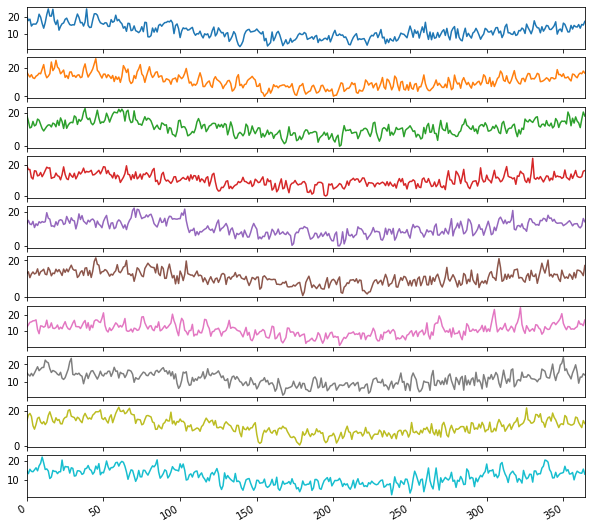

In [3]:
# create stacked line plots
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

csvfile = '.\\code\chapter_06\daily-minimum-temperatures.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

groups = series.groupby(Grouper(freq='A'))
years = DataFrame()

for name, group in groups:
    years[name.year] = group.values

years.plot(subplots=True, legend=False, figsize=(10,10))
pyplot.show()

Running the example creates 10 line plots, one for each year from 1981 at the top and 1990 at the bottom, **where each line plot is 365 days in length**.

## 6.4 Histogram and Density Plots

Another important visualization is of the distribution of observations themselves. This means a plot of the values without the temporal ordering. Some linear time series forecasting methods assume a well-behaved distribution of observations (i.e. a bell curve or normal distribution).

This can be explicitly checked using tools like statistical hypothesis tests. But plots can provide a useful first check of the distribution of observations both on raw observations and after any type of data transform has been performed.

A **histogram groups values into bins**, and the frequency or count of observations in each bin can provide insight into the underlying distribution of the observations.

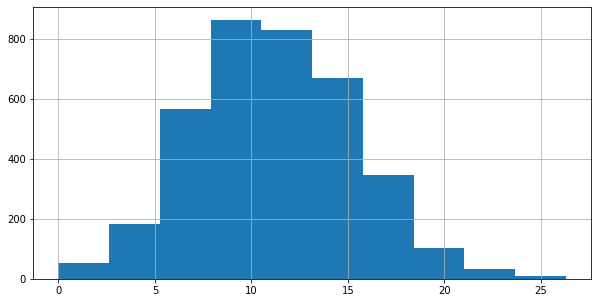

In [4]:
# create a histogram plot
from pandas import read_csv
from matplotlib import pyplot

csvfile = '.\\code\chapter_06\daily-minimum-temperatures.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

series.hist(figsize=(10, 5))
pyplot.show()

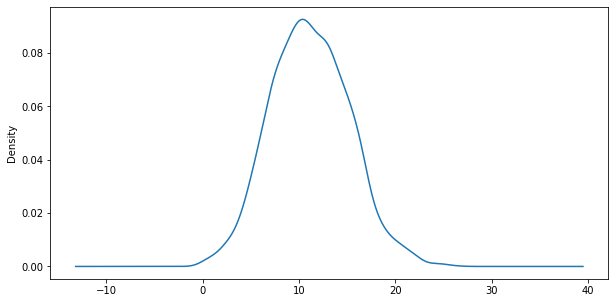

In [5]:
# create a density plot
from pandas import read_csv
from matplotlib import pyplot

csvfile = '.\\code\chapter_06\daily-minimum-temperatures.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

series.plot(kind='kde', figsize=(10, 5))
pyplot.show()

We can see that perhaps the distribution is a little asymmetrical and perhaps a little pointy to be Gaussian. Seeing a distribution like this may suggest later exploring statistical hypothesis tests to formally check if the distribution is Gaussian and **perhaps data preparation techniques to reshape the distribution, like the Box-Cox transform**.

## 6.5 Box and Whisker Plots by Interval

Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.

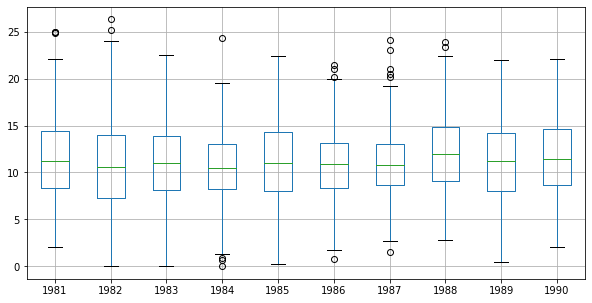

In [6]:
# create a boxplot of yearly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

csvfile = '.\\code\chapter_06\daily-minimum-temperatures.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values

years.boxplot(figsize=(10, 5))
pyplot.show()

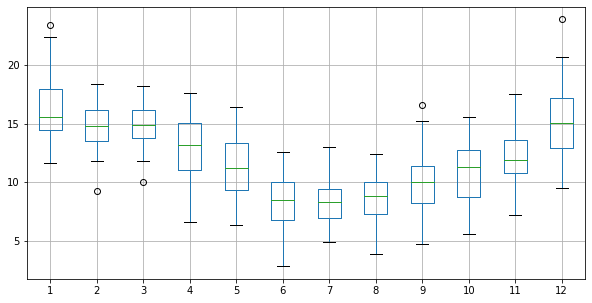

In [7]:
# create a boxplot of monthly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat

csvfile = '.\\code\chapter_06\daily-minimum-temperatures.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

one_year = series['1988']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13) # create month column number

months.boxplot(figsize=(10, 5))
pyplot.show()

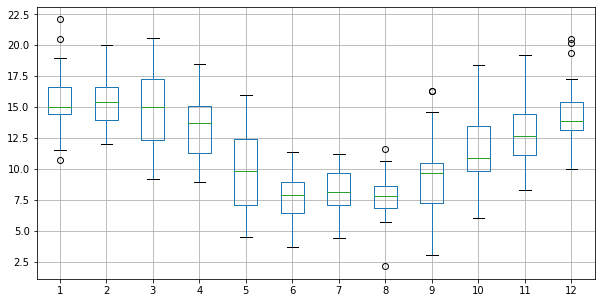

In [8]:
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13) # create month column number

months.boxplot(figsize=(10, 5))
pyplot.show()

## 6.6 Heat Maps

A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are assigned a unique color. This is called a heatmap, as **larger values** can be drawn with warmer colors (`yellows and reds`) and **smaller values** can be drawn with cooler colors (`blues and greens`).

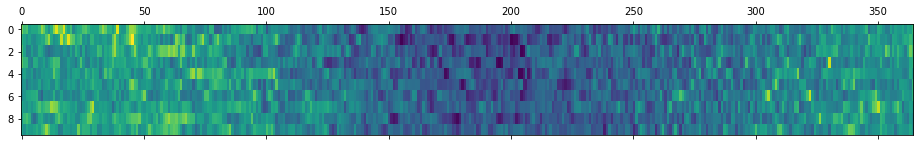

In [9]:
# create a heat map of yearly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

csvfile = '.\\code\chapter_06\daily-minimum-temperatures.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values

years = years.T # rotated (transposed)
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

The plot shows the cooler minimum temperatures in the middle days of the years and the warmer minimum temperatures in the start and ends of the years, and all the fading and complexity in between.

Below is an example of a heat map comparing the months of the year in 1990. Each column represents one month, with rows representing the days of the month from 1 to 31.

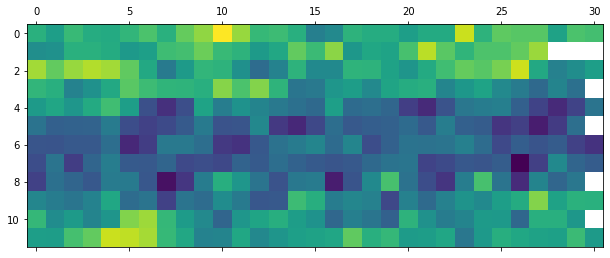

In [10]:
# create a heat map of monthly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat

csvfile = '.\\code\chapter_06\daily-minimum-temperatures.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)

months = months.T # rotated (transposed)
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()

We can also see some white patches at the bottom of the plot. This is missing data for those months that have fewer than 31 days, with February being quite an outlier with 28 days in 1990.

## 6.7 Lag Scatter Plots

Time series modeling assumes a relationship between an observation and the previous observation.

Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag=2, and so on. A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot.

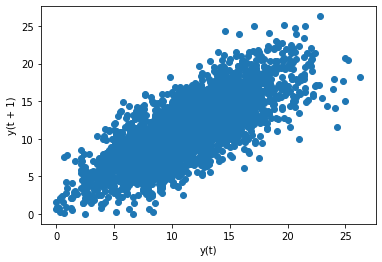

In [11]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot

csvfile = '.\\code\chapter_06\daily-minimum-temperatures.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

lag_plot(series)
pyplot.show()

The plot created from running the example shows a relatively strong positive correlation between observations and their lag1 values.

- If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
- If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.
- Either relationship is good as they can be modeled.
- More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship. A ball in the middle or a spread across the plot suggests a weak or no relationship.

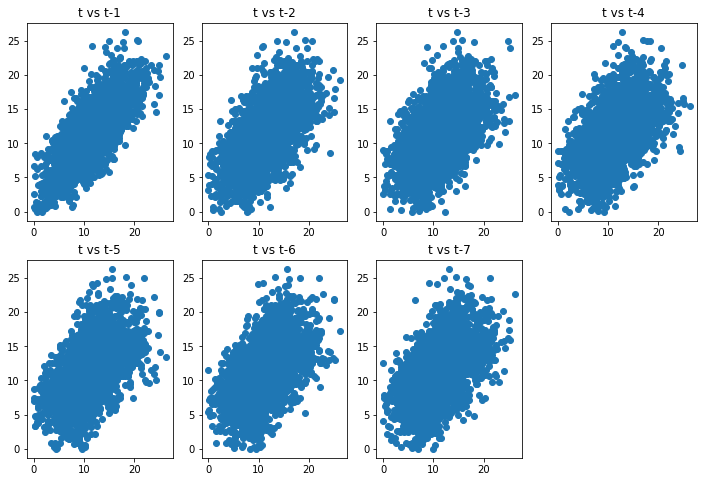

In [12]:
# create multiple scatter plots
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot

csvfile = '.\\code\chapter_06\daily-minimum-temperatures.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

values = DataFrame(series.values)
lags = 7
columns = [values]

for i in range(1,(lags + 1)):
    columns.append(values.shift(i))

dataframe = concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))

dataframe.columns = columns
pyplot.figure(1, figsize=(12, 8))

for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()    

## 6.8 Autocorrelation Plots

We can quantify the strength and type of relationship between observations and their lags. In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation).

**Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band**.

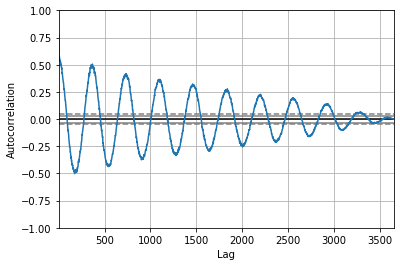

In [13]:
# create an autocorrelation plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

csvfile = '.\\code\chapter_06\daily-minimum-temperatures.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

autocorrelation_plot(series)
pyplot.show()

A correlation value calculated between two groups of numbers, such as observations and their lag=1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.

The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines are provided that indicate any correlation values above those lines are statistically signifficant (meaningful). We can see that for the Minimum Daily Temperatures dataset we see cycles of strong negative and positive correlation. This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. **Sine waves like those seen in this example are a strong sign of seasonality in the dataset**.